In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


39.51142489302774 -24.333470876309008
-84.7846426082603 -61.83508928962807
23.74418604891808 68.71996262265367
-80.36213812009498 -159.0219415355319
80.47699818163923 -107.55028305963128
-75.91246744826525 -25.591195423853208
-20.063249150509023 93.73895709276252
13.94100142135774 172.44578399191448
43.93105876112543 54.85036956772791
62.96439309981582 3.9332789275694324
63.828975610539885 -128.44155256401535
-20.886733591874645 -118.32015759048902
-19.69433405119841 -128.91934722077747
64.09076694074227 -71.36178328627355
-27.66697771126242 -45.07929666895805
63.892425440456634 150.2307983888026
-63.62398160283068 -90.03288087847724
-29.658325171787048 120.81820324202062
-38.71486514628542 161.54518611801439
-68.17440676817984 10.980926255207976
-13.35312797958504 93.65419557166308
12.643907678009754 -32.76117826069927
12.665484902992873 -82.04064290655477
-61.59529999483837 70.5010661874677
37.49634589689171 118.24870096176011
-83.92233636021452 -108.58256964667913
74.69079129205772 

-0.5740651780825772 -166.34890554672992
-64.40623660449893 -124.91244393432592
-49.83595365423634 -77.94676292313787
23.976499797367154 170.24647930827973
-43.5575904849759 -165.27561212586085
64.1873727541207 10.269828705997867
89.59025921658642 -95.12013874756472
-16.79090354927105 75.80762376504117
64.3982525820004 -147.19128939513558
85.45631827740229 35.21692307635152
-65.50695259624383 -73.48892251338658
68.80122074272344 175.09906526472002
55.741868887853684 -25.048790412344403
-16.35126760826593 -103.88747823081492
-42.850960124239336 124.64929808182342
41.65759604792228 -138.08897401044774
-24.78431733703752 -70.5915820910314
48.44159545440755 48.25171168519134
-47.78231689350588 62.089079195420226
50.58755179356322 -70.84494654797797
49.16871868976594 -131.82877180812557
20.46924046605244 -133.98960406506774
-35.43393119561329 160.8804571710637
4.52542427115965 -158.07278213187885
-43.765704567739135 -18.278248806409408
-54.09362786171306 -130.64657918871387
80.6223391782676 

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [22]:
# Import requests library and key.
import requests
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | naliya
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | labuhan
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | beyneu
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | florianopolis
Processing Record 14 of Set 1 | yagodnoye
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | san andres
Processing Record 22 of Set 1 | saint-philippe
Processing Rec

Processing Record 188 of Set 4 | vicam
Processing Record 189 of Set 4 | mus
Processing Record 190 of Set 4 | roald
Processing Record 191 of Set 4 | mercedes
Processing Record 192 of Set 4 | belozerskoye
Processing Record 193 of Set 4 | wharton
Processing Record 194 of Set 4 | ahuimanu
Processing Record 195 of Set 4 | andenes
Processing Record 196 of Set 4 | eyl
Processing Record 197 of Set 4 | basco
Processing Record 198 of Set 4 | waipawa
Processing Record 199 of Set 4 | saint george
Processing Record 200 of Set 4 | ust-ilimsk
Processing Record 201 of Set 4 | alta
Processing Record 202 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 203 of Set 4 | bowen
Processing Record 205 of Set 5 | isabela
Processing Record 206 of Set 5 | seoul
Processing Record 207 of Set 5 | egvekinot
Processing Record 208 of Set 5 | paidha
Processing Record 209 of Set 5 | tulun
Processing Record 210 of Set 5 | jubayl
City not found. Skipping...
Processing Record 211 of Set 5 | juneau
Proce

Processing Record 380 of Set 8 | thomasville
Processing Record 381 of Set 8 | constitucion
Processing Record 382 of Set 8 | los zacatones
Processing Record 383 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 384 of Set 8 | catacaos
Processing Record 385 of Set 8 | nantucket
Processing Record 386 of Set 8 | paamiut
Processing Record 387 of Set 8 | grand-lahou
Processing Record 388 of Set 8 | kamaishi
Processing Record 389 of Set 8 | vazhiny
Processing Record 390 of Set 8 | krasnoselkup
Processing Record 391 of Set 8 | batagay-alyta
Processing Record 392 of Set 8 | nuevitas
Processing Record 393 of Set 8 | talnakh
Processing Record 394 of Set 8 | mananara
Processing Record 395 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 396 of Set 8 | miajadas
Processing Record 397 of Set 8 | stavern
Processing Record 398 of Set 8 | pangnirtung
Processing Record 399 of Set 8 | namatanai
Processing Record 400 of Set 8 | djibo
Processing Record 401 of Set 8 | amont

Processing Record 564 of Set 12 | wanning
Processing Record 565 of Set 12 | iracoubo
Processing Record 566 of Set 12 | astana
Processing Record 567 of Set 12 | la ferte-bernard
Processing Record 568 of Set 12 | caramay
Processing Record 569 of Set 12 | tiarei
Processing Record 570 of Set 12 | san luis
Processing Record 571 of Set 12 | taywarah
Processing Record 572 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 573 of Set 12 | corinto
Processing Record 574 of Set 12 | diamantino
Processing Record 575 of Set 12 | tezu
Processing Record 576 of Set 12 | lagoa da canoa
Processing Record 577 of Set 12 | ashitkovo
Processing Record 578 of Set 12 | mehamn
Processing Record 579 of Set 12 | garowe
Processing Record 580 of Set 12 | zhezkazgan
Processing Record 581 of Set 12 | inhambane
Processing Record 582 of Set 12 | talcahuano
Processing Record 583 of Set 12 | sitka
Processing Record 584 of Set 12 | mae ramat
Processing Record 585 of Set 12 | tilichiki
Processing Record 586

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.7167,-25.4333,75.20,83,46,5.68,PT,2022-07-17 22:55:28
1,Ushuaia,-54.8000,-68.3000,40.66,48,20,9.22,AR,2022-07-17 22:55:28
2,Naliya,23.2667,68.8333,81.00,84,29,14.81,IN,2022-07-17 22:55:29
3,Mataura,-46.1927,168.8643,53.47,55,98,13.35,NZ,2022-07-17 22:55:29
4,Yellowknife,62.4560,-114.3525,63.12,82,100,11.50,CA,2022-07-17 22:55:30
5,Labuhan,-6.8844,112.2051,75.11,87,96,6.73,ID,2022-07-17 22:55:30
6,Butaritari,3.0707,172.7902,81.93,74,66,11.36,KI,2022-07-17 22:55:30
7,Beyneu,45.3167,55.2000,89.29,19,0,9.06,KZ,2022-07-17 22:55:31
8,Raudeberg,61.9875,5.1352,56.07,88,83,21.21,NO,2022-07-17 22:55:31
9,Norman Wells,65.2820,-126.8329,77.04,38,75,8.05,CA,2022-07-17 22:55:32


In [27]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Franca Do Campo,PT,2022-07-17 22:55:28,37.7167,-25.4333,75.20,83,46,5.68
1,Ushuaia,AR,2022-07-17 22:55:28,-54.8000,-68.3000,40.66,48,20,9.22
2,Naliya,IN,2022-07-17 22:55:29,23.2667,68.8333,81.00,84,29,14.81
3,Mataura,NZ,2022-07-17 22:55:29,-46.1927,168.8643,53.47,55,98,13.35
4,Yellowknife,CA,2022-07-17 22:55:30,62.4560,-114.3525,63.12,82,100,11.50
5,Labuhan,ID,2022-07-17 22:55:30,-6.8844,112.2051,75.11,87,96,6.73
6,Butaritari,KI,2022-07-17 22:55:30,3.0707,172.7902,81.93,74,66,11.36
7,Beyneu,KZ,2022-07-17 22:55:31,45.3167,55.2000,89.29,19,0,9.06
8,Raudeberg,NO,2022-07-17 22:55:31,61.9875,5.1352,56.07,88,83,21.21
9,Norman Wells,CA,2022-07-17 22:55:32,65.2820,-126.8329,77.04,38,75,8.05


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

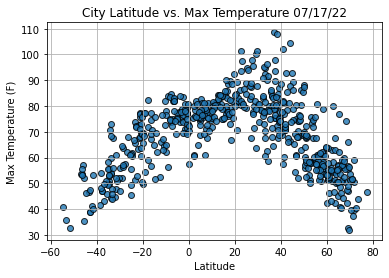

In [30]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

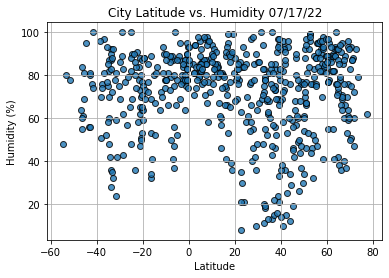

In [31]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

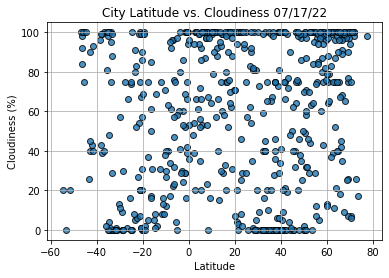

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

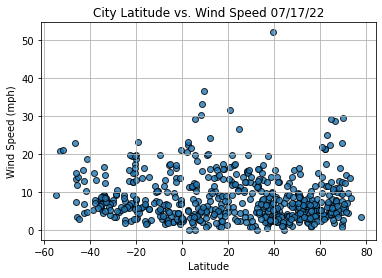

In [33]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

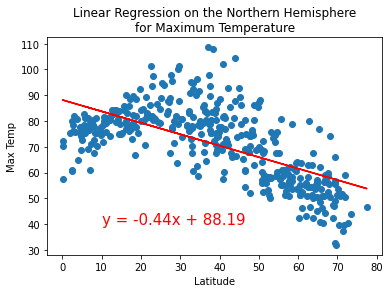

In [36]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

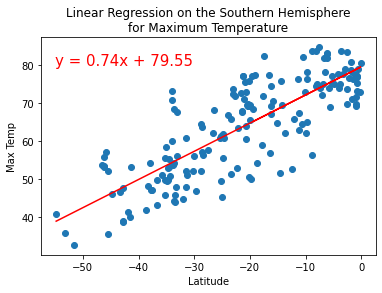

In [37]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,80))

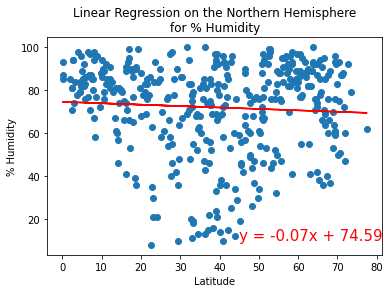

In [42]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(45,10))

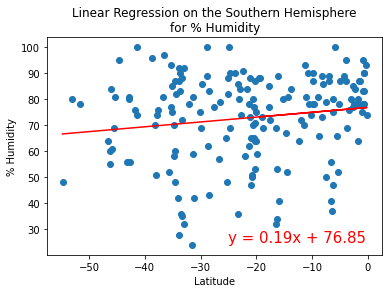

In [80]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-25, 25))

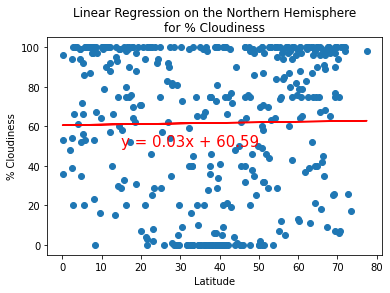

In [89]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(15,50))

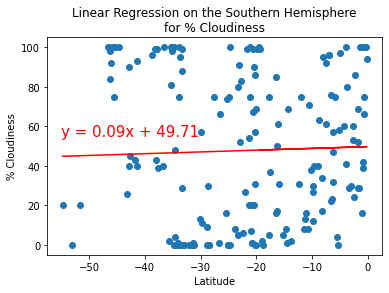

In [97]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-55, 55))

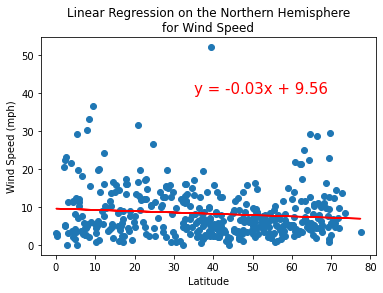

In [156]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(35,40))

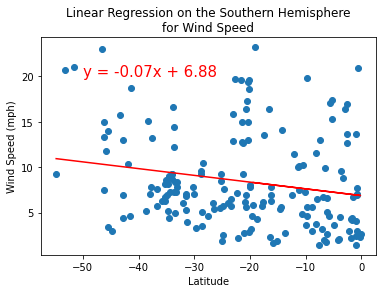

In [157]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(-50, 20))